In [160]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive
import ipywidgets
%matplotlib inline

# Reading the dataframe 

In [98]:
DATA_FOLDER = './'
df = pd.read_csv(os.path.join(DATA_FOLDER, 'pokemon.csv'))

# 0. Obtaining the understanding of dataframe 
(As I never played or watched Pokemon before)

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,800
Total Missing (%),3.7%
Total size in memory,75.9 KiB
Average record size in memory,97.1 B
Numeric,8
Categorical,2
Boolean,1
Date,0
Text (Unique),1
Rejected,1


In [7]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 1-2. Scatter Plot & Defense vs Attack characteristics of the Pokemon

Use the scatter plot to show the relationship between attack and defense

Text(0.5, 1.0, 'Scatter Plot between Attack and Defense')

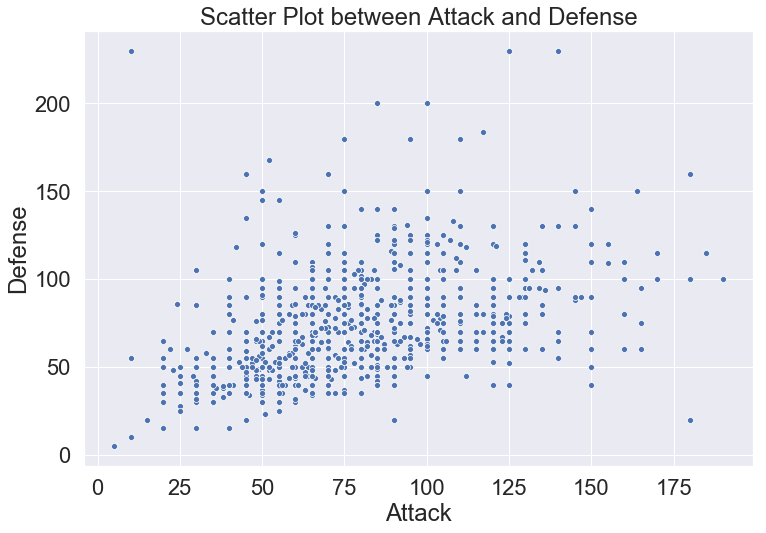

In [186]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize = (12,8))
ax = plt.axes()
sns.set(font_scale=2)
sns.scatterplot(df.Attack, df.Defense)
ax.set_title('Scatter Plot between Attack and Defense')

# 3. Primary-type vs attribute heat map | non-legendary & legendary Pokemon

In [154]:
# Drop unnecessary column for furthur processing
df_groupby = df[['Type 1', 'Legendary','HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def','Speed']]

In [155]:
# Get dataframe for LEGENDARY pokemon
df_groupby_L = df_groupby[df_groupby['Legendary']==True]
df_groupby_L.drop(['Legendary'],axis =1, inplace = True)
df_groupby_L = df_groupby_L.groupby(['Type 1']).mean()
df_groupby_L

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Dark,98.000000,110.500000,92.500000,133.000000,94.000000,112.000000
Dragon,101.083333,126.666667,100.083333,136.750000,107.916667,100.833333
Electric,84.500000,98.750000,75.000000,127.500000,87.500000,106.750000
Fairy,126.000000,131.000000,95.000000,131.000000,98.000000,99.000000
Fire,96.400000,109.000000,98.200000,117.000000,102.000000,85.400000
Flying,79.000000,107.500000,75.000000,117.500000,85.000000,116.000000
Ghost,150.000000,110.000000,110.000000,110.000000,110.000000,90.000000
Grass,97.000000,97.666667,82.333333,103.333333,101.333333,111.666667
Ground,94.500000,150.000000,120.000000,117.500000,85.000000,93.000000


In [157]:
# Get dataframe for NON-LEGENDARY pokemon
df_groupby_NL = df_groupby[df_groupby['Legendary']==False]
df_groupby_NL.drop(['Legendary'],axis =1, inplace = True)
df_groupby_NL = df_groupby_NL.groupby(['Type 1']).mean()
df_groupby_NL

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Dark,64.655172,86.862069,68.689655,70.620690,67.827586,73.689655
Dragon,72.650000,103.400000,78.150000,72.900000,77.400000,72.350000
Electric,57.325000,66.125000,65.425000,86.275000,72.325000,82.275000
Fairy,70.875000,57.187500,63.875000,75.250000,83.875000,45.437500
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
Fire,67.085106,82.191489,64.531915,86.000000,69.042553,73.276596
Flying,62.500000,50.000000,57.500000,71.000000,60.000000,89.000000
Ghost,58.733333,71.366667,79.266667,77.300000,74.233333,62.633333


Text(0.5, 1.0, 'Non-Legendary Pokemon')

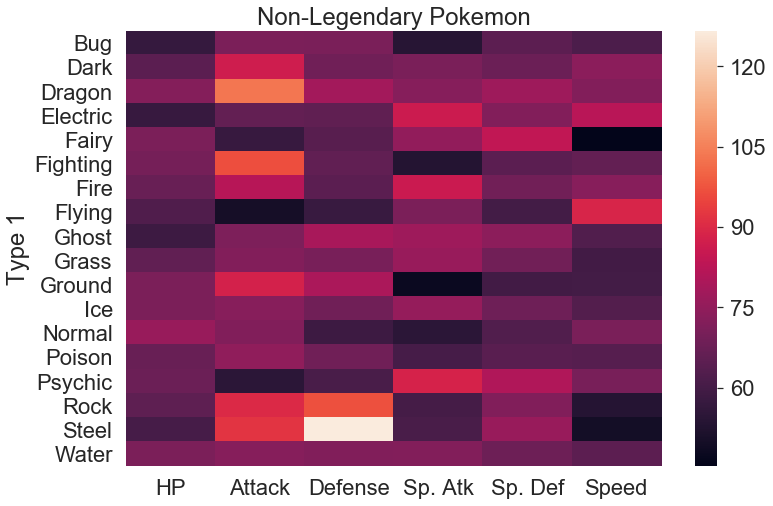

In [158]:
# Plot heatmap for Non-Legendary Pokemon
plt.figure(figsize = (12,8))
ax = plt.axes()
sns.set(font_scale=2)
sns.heatmap(df_groupby_NL)
ax.set_title('Non-Legendary Pokemon')

Text(0.5, 1.0, 'Legendary Pokemon')

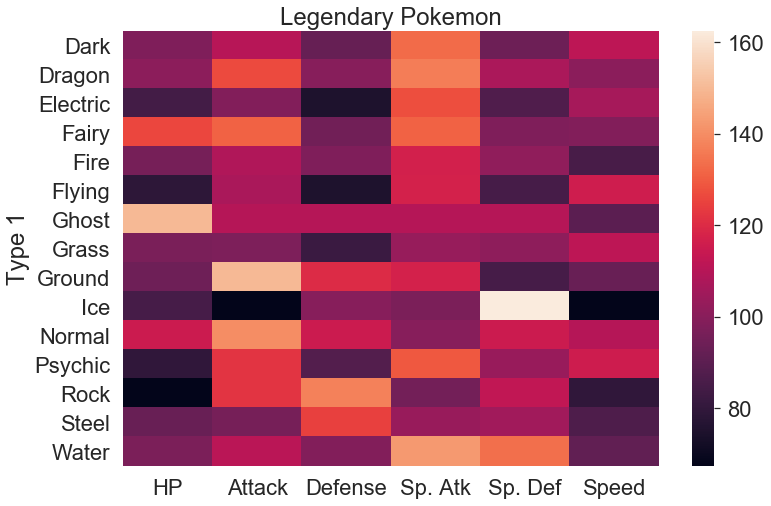

In [159]:
# Plot heatmap for Non-Legendary Pokemon
plt.figure(figsize = (12,8))
ax = plt.axes()
sns.set(font_scale=2)
sns.heatmap(df_groupby_L)
ax.set_title('Legendary Pokemon')

# 4. Effectiveness of Pokemon based on primary type (heat map visualization, dropdown list for filter and option to save as excel file)

In [167]:
# Select the attribute columns as indication of "effectiveness"
df_effectiveness = df[['Type 1', 'Legendary','HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def','Speed']]

In [161]:
# Make a dropdown to filter Legendary and Primary Type
Legendary = widgets.Dropdown(
    options=['All'] + list(df_groupby['Legendary'].unique()),
    value='All',
    description='Legendary:',
)

PrimaryType = widgets.Dropdown(
    options=['All'] + list(df_groupby.reset_index()['Type 1'].unique()),
    value='All',
    description='Primary Type:',
)

In [182]:
# Make a button to export the data as excel
SaveToFile = widgets.Button(description="Export")

def export(df,img):
    
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter('export_file.xlsx', engine='xlsxwriter')

    # Convert the dataframe to an XlsxWriter Excel object.
    df.to_excel(writer, sheet_name='Sheet1')

    # Get the xlsxwriter workbook and worksheet objects.
    workbook  = writer.book
    worksheet = writer.sheets['Sheet1']

    # Insert an image.
    worksheet.insert_image('I1', img)
    
    # Close the Pandas Excel writer and output the Excel file.
    writer.save()

SaveToFile.on_click(save_to_excel)

In [183]:
def interactive_plot(Legendary, PrimaryType):
    """
    The function plot the interactive plot with filters and button to export
    """
    # Display the button
    display(SaveToFile)
    
    # If the definition of the effectiveness changes, we can easily change here
    df_plot = df_effectiveness.copy()
    
    # Filtering 
    if Legendary != 'All':
        df_plot = df_plot[df_plot['Legendary'] == Legendary]
    if PrimaryType != 'All':
        df_plot = df_plot[df_plot['Type 1']==PrimaryType]

    #### Plot the data
    
    # Drop the lengendary column since its already selected
    df_plot.drop(['Legendary'],axis =1, inplace = True)
    # Group the dataframe for plotting
    df_plot_final = df_plot.groupby(['Type 1']).mean()
    
    # Plot
    sns.set(font_scale=2)
    plt.figure(figsize = (12,8))
    ax = plt.axes()
    sns.heatmap(df_plot_final)
    ax.set_title('Legendary: {} \n Primary Type:{}'.format(Legendary, PrimaryType))
    
    # Save the image
    plt.savefig('plot_fig.png')
    
    # when button is clicked, it will save the excel file to local directory
    SaveToFile.on_click(export(df_plot_final, img = 'plot_fig.png'))


In [184]:
interactive(interactive_plot, Legendary = Legendary, PrimaryType=PrimaryType, SaveToFile = SaveToFile)

interactive(children=(Dropdown(description='Legendary:', options=('All', False, True), value='All'), Dropdown(…